The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [ ]:
A1. bank client data:
1 - age: (numeric)
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education: (categorical: primary, secondary, tertiary and unknown)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - balance: Balance of the individual.

A2. Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

A3. other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/bank.csv",sep = ',')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
data.loan.replace(('yes', 'no'), (1, 0), inplace=True)
data.default.replace(('yes', 'no'), (1, 0), inplace=True)
data.housing.replace(('yes', 'no'), (1, 0), inplace=True)
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


In [ ]:
data.marital.replace(('single', 'married','divorced'), (0, 1,2), inplace=True)
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,1,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,1,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,1,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,0,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,1,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,2,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,1,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,0,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


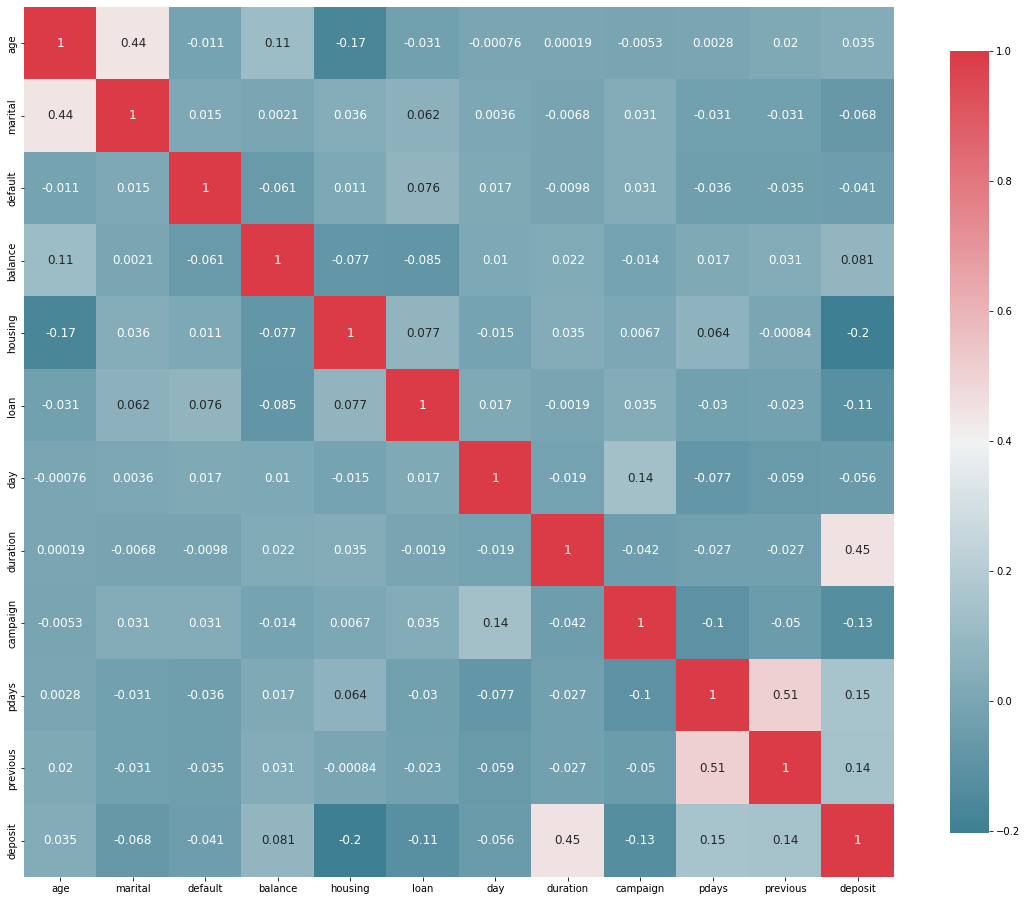

In [ ]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 20 , 16 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(data)

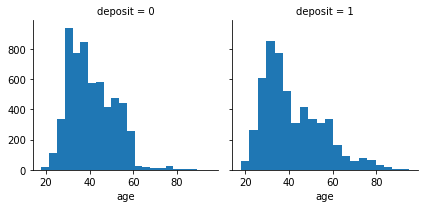

In [ ]:
import matplotlib.pyplot as plt
cor=sns.FacetGrid(data,col='deposit')
cor.map(plt.hist,'age',bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


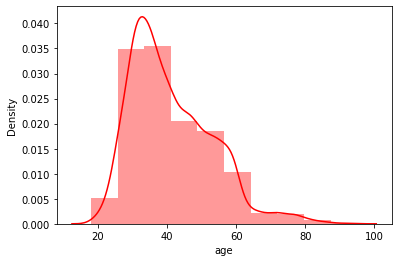

In [ ]:
sns.distplot(data["age"],bins=10,hist=True,kde=True,color='red')

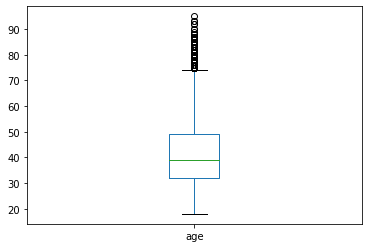

In [ ]:
data["age"].plot.box()

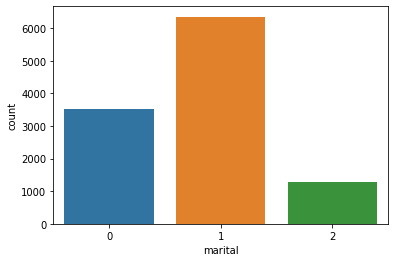

In [ ]:
import seaborn as sns
ax = sns.countplot(x=data["marital"])

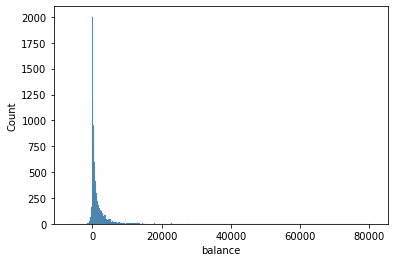

In [ ]:
sns.histplot(x = data['balance'], data = data)


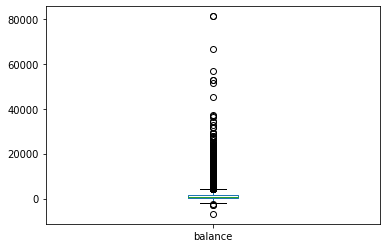

In [ ]:
data["balance"].plot.box()

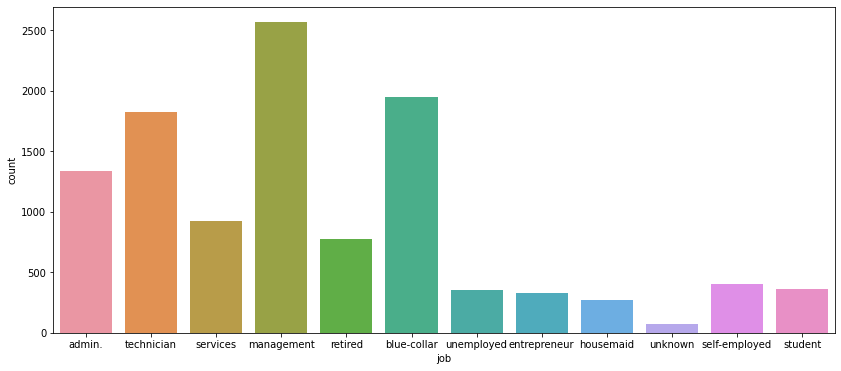

In [ ]:
plt.figure(figsize=(14,6))
import seaborn as sns
ax = sns.countplot(x=data["job"])

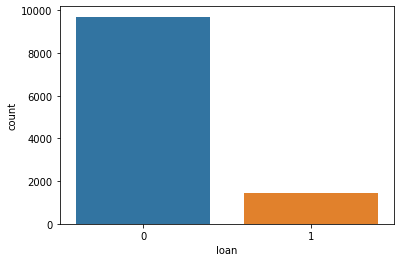

In [ ]:
ax = sns.countplot(x=data["loan"])

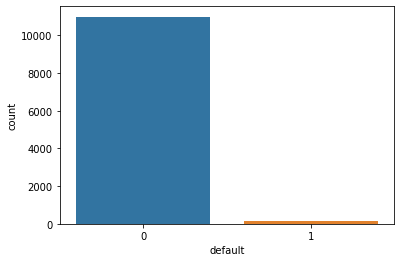

In [ ]:
ax = sns.countplot(x=data["default"])

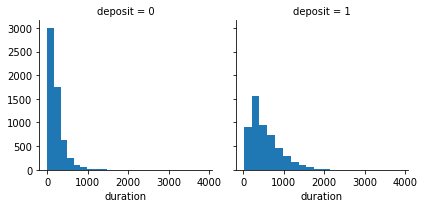

In [ ]:
cor=sns.FacetGrid(data,col='deposit')
cor.map(plt.hist,'duration',bins=20)

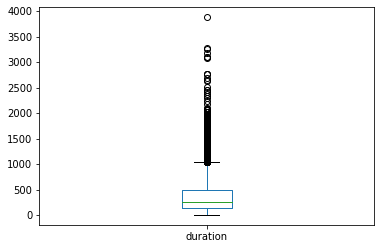

In [ ]:
data["duration"].plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


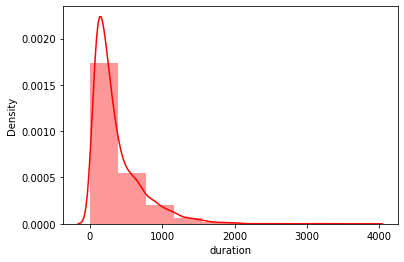

In [ ]:
sns.distplot(data["duration"],bins=10,hist=True,kde=True,color='red')

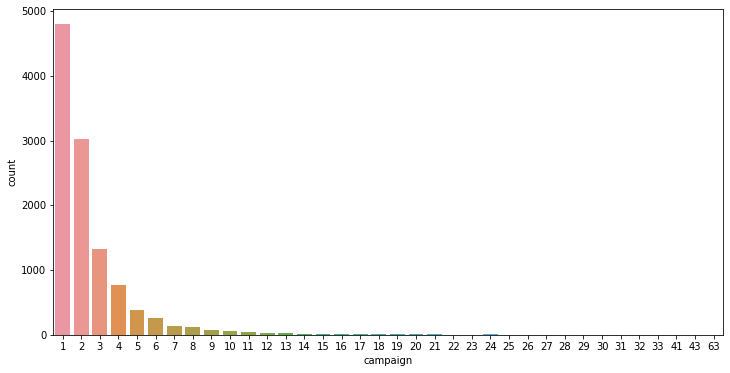

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=data["campaign"])

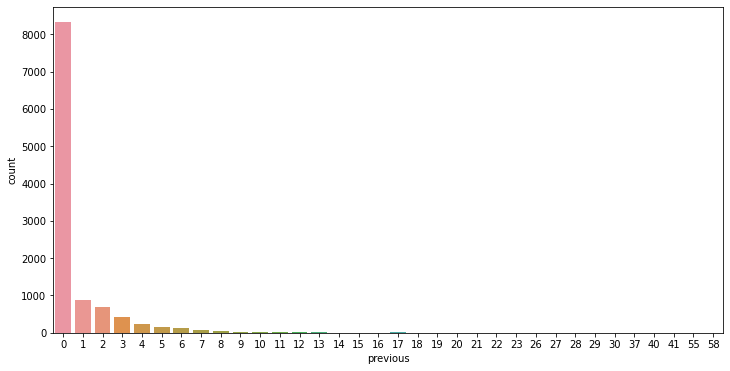

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=data["previous"])

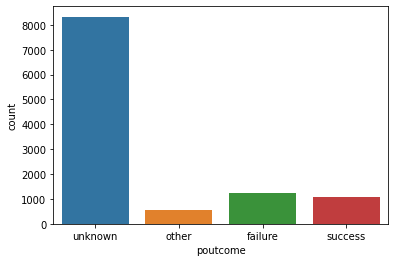

In [ ]:
ax = sns.countplot(x=data["poutcome"])

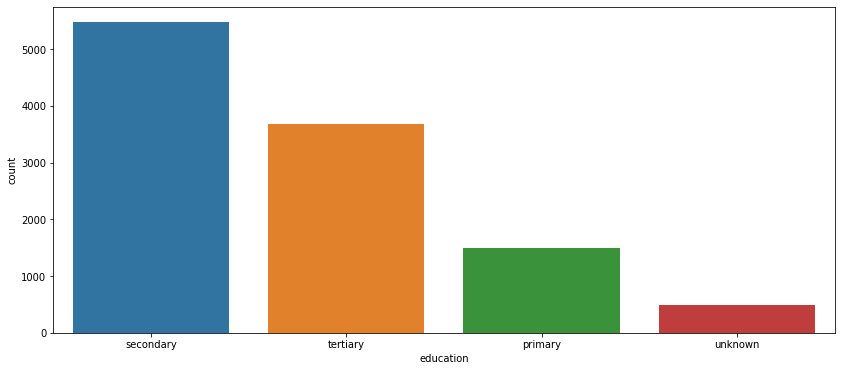

In [ ]:
plt.figure(figsize=(14,6))
import seaborn as sns
ax = sns.countplot(x=data["education"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['poutcome']=encoder.fit_transform(data["poutcome"])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,3,1
1,56,admin.,1,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,3,1
2,41,technician,1,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,3,1
3,55,services,1,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,3,1
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,3,1


In [ ]:
encoder=LabelEncoder()
data['job']=encoder.fit_transform(data["job"])

In [ ]:
x = data[['age',	'marital'	,'default',	'balance',	'housing',	'loan',	'duration',	'campaign',	'pdays',	'previous',	'poutcome']]
y = data['deposit']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense 
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
#splitting data
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.1)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu')
])
model.add(Dense(128, input_dim=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, input_dim=128, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
y_pred = model.predict(X_test)
from keras.callbacks import EarlyStopping
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=15)]
model.fit(X_model, y_model, validation_data=(X_valid, y_valid), epochs= 100,  callbacks = mycallbacks)

Epoch 1/100
252/252 [==============================] - 1s 4ms/step - loss: 10.2820 - accuracy: 0.6117 - val_loss: 0.7120 - val_accuracy: 0.6745
Epoch 2/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8289 - accuracy: 0.6702 - val_loss: 0.5474 - val_accuracy: 0.7242
Epoch 3/100
252/252 [==============================] - 1s 2ms/step - loss: 0.6117 - accuracy: 0.7118 - val_loss: 0.5432 - val_accuracy: 0.7446
Epoch 4/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5700 - accuracy: 0.7278 - val_loss: 0.5252 - val_accuracy: 0.7541
Epoch 5/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5612 - accuracy: 0.7336 - val_loss: 0.5300 - val_accuracy: 0.7466
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.7239 - val_loss: 0.5403 - val_accuracy: 0.7437
Epoch 7/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7332 - val_loss: 0.5141 - val_accuracy: 0.755

In [ ]:
model.evaluate(X_valid,y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7889


[0.442740261554718, 0.788949728012085]

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               1536      
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________
